K-Means Project Online-retail

In [181]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns',999)


Data Exploration


In [182]:
df = pd.read_excel("C:\\Users\\Sebastian\\Documents\\Datasets\\K-Means Project\\online_retail_II.xlsx", sheet_name=0)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [184]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [185]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [186]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [187]:
df[df["Quantity"]<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


The letter C according to the data sheet represents a cancellation of an order.

In [188]:
df["Invoice"] = df["Invoice"].astype("str")

# I want six digits only so I will match using Regex
df[df["Invoice"].str.match("^\\d{6}$") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


double checking if "C" is the only character that Invoices contains 

In [189]:
df["Invoice"].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [190]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


These look like accounting values (Debt) for the business

In [191]:
df["StockCode"] = df["StockCode"].astype("str")

df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$"))]["StockCode"].unique()



array(['79323P', '79323W', '48173C', ..., '85049g', '72803b', '79151B'],
      dtype=object)

The stock codes contain letters at the end, yet all of these look like valid transactions. The data sheet does not mention anything about these, so I will continue assuming they are valid.

In [192]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


#### Stock Code
* StockCode is meant to follow the pattern `[0-9]{5}` but seems to have legit values for `[0-9]{5}[a-zA-Z]+`
    * Also contains other values:
        | **Code**            | **Description**                                                        | **Action**              |
        |---------------------|------------------------------------------------------------------------|-------------------------|
        | DCGS            | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering |
        | D               | Looks valid, represents discount values                                | Exclude from clustering |
        | DOT             | Looks valid, represents postage charges                                | Exclude from clustering |
        | M or m          | Looks valid, represents manual transactions                            | Exclude from clustering |
        | C2              | Carriage transaction - not sure what this means                        | Exclude from clustering |
        | C3              | Not sure, only 1 transaction                                           | Exclude                 |
        | BANK CHARGES or B | Bank charges                                                        | Exclude from clustering |
        | S               | Samples sent to customer                                               | Exclude from clustering |
        | TESTXXX         | Testing data, not valid                                                | Exclude from clustering |
        | gift__XXX       | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude |
        | PADS            | Looks like a legit stock code for padding                              | Include                 |
        | SP1002          | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now|
        | AMAZONFEE       | Looks like fees for Amazon shipping or something                       | Exclude for now         |
        | ADJUSTX         | Looks like manual account adjustments by admins                        | Exclude for now         |

PADS would be the only legit stock code for padding,

Data Cleaning

In [193]:
cleaned_df = df.copy()

In [194]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [195]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) |
    (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True) |
    (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [196]:
cleaned_df.dropna(subset=["Customer ID"], inplace =  True)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_22000\961727836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace =  True)


In [197]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [198]:
len(cleaned_df[cleaned_df["Price"] == 0])

28

In [199]:
cleaned_df = cleaned_df[cleaned_df["Price"]> 0]

In [200]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [201]:
cleaned_df["Price"].min()

0.001

In [202]:
len(cleaned_df) / len(df)

0.7732429238325965

We lost about 23 % of the data during the cleaning process

Feature Engineering

In [203]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_22000\2846558921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [204]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index= False) \
    .agg(
        MonetaryValue = ("SalesLineTotal", "sum"),
        Frequency = ("Invoice", "nunique"),
        LastInvoiceDate = ("InvoiceDate","max")
    )

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [205]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


In [206]:
aggregated_df["Log_MonetaryValue"] = np.log1p(aggregated_df["MonetaryValue"])

Text(0, 0.5, 'Count')

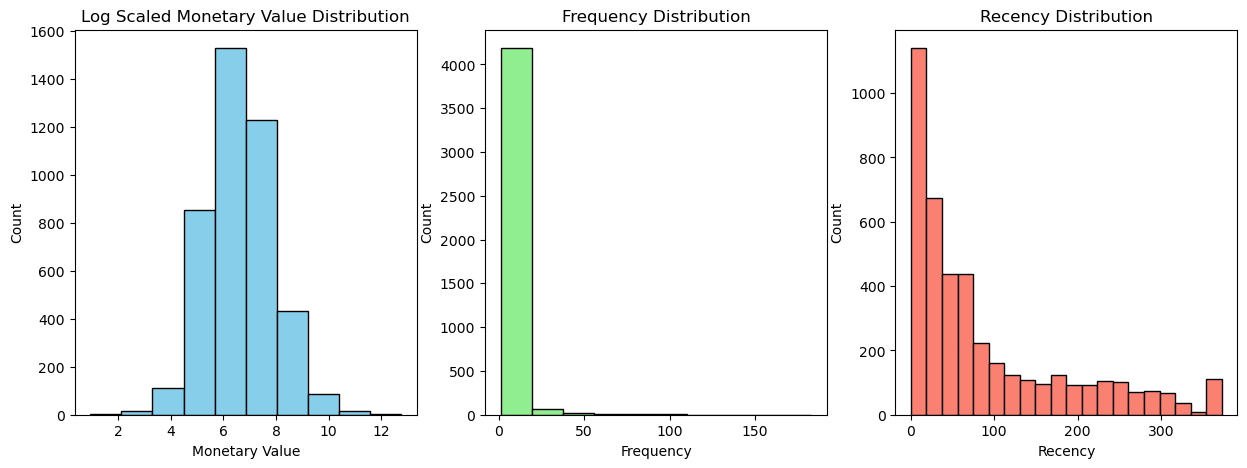

In [207]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df["Log_MonetaryValue"], bins= 10, color= "skyblue", edgecolor = "black")
plt.title("Log Scaled Monetary Value Distribution")
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df["Frequency"], bins= 10, color= "lightgreen", edgecolor = "black")
plt.title("Frequency Distribution")
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"], bins= 20, color= "salmon", edgecolor = "black")
plt.title("Recency Distribution")
plt.xlabel('Recency')
plt.ylabel('Count')

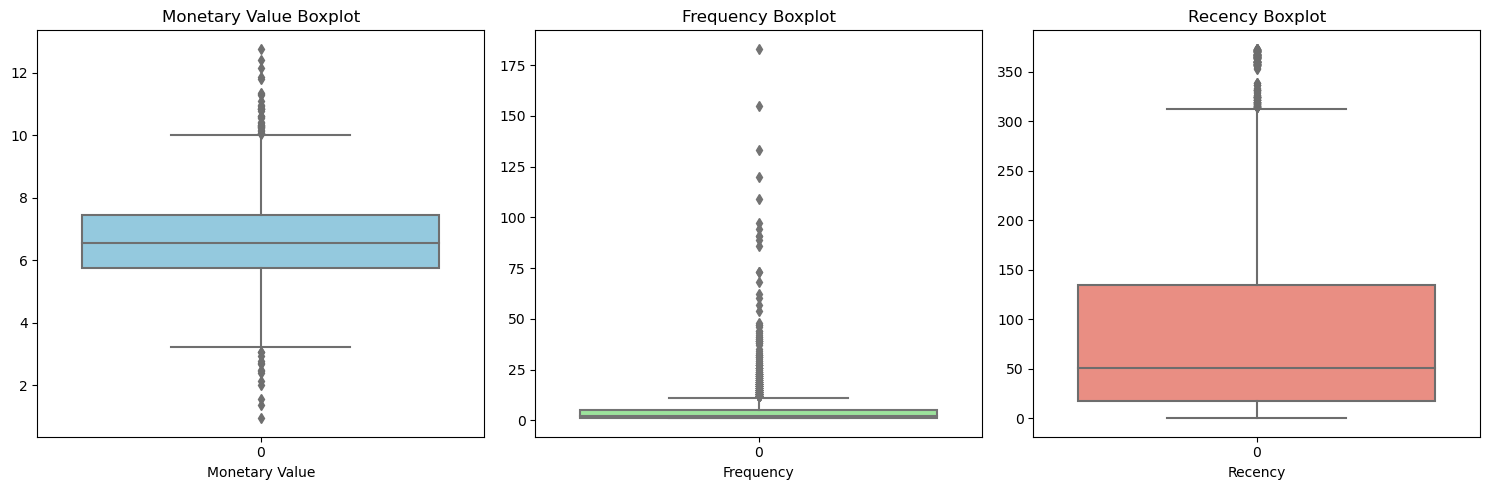

In [208]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df["Log_MonetaryValue"], color= "skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df["Frequency"], color= "lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data = aggregated_df["Recency"],color= "salmon")
plt.title("Recency Boxplot")
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

Outlier Detection IQR Method

In [209]:
M_Q1 = aggregated_df["Log_MonetaryValue"].quantile(0.25)

M_Q3 = aggregated_df["Log_MonetaryValue"].quantile(0.75)

M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["Log_MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["Log_MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))]

monetary_outliers_df.describe()




,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Log_MonetaryValue
count,48.00,48.00,48.00,48,48.00,48.00
mean,15434.88,47696.28,39.19,2010-09-26 21:42:35,73.69,8.34
min,12931.00,1.55,1.00,2009-12-04 12:31:00,0.00,0.94
25%,13896.75,19.71,1.00,2010-07-08 15:17:15,3.75,3.03
50%,15186.00,30190.26,27.00,2010-12-01 13:36:00,8.00,10.32
75%,16760.25,51512.23,54.75,2010-12-05 21:11:15,154.00,10.85
max,18115.00,349164.35,183.00,2010-12-09 17:34:00,370.00,12.76
std,1669.92,66465.18,43.24,NaN,111.41,3.96


In [210]:
M_Q1 = aggregated_df["Frequency"].quantile(0.25)

M_Q3 = aggregated_df["Frequency"].quantile(0.75)

M_IQR = M_Q3 - M_Q1

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["Frequency"] < (M_Q1 - 1.5 * M_IQR))]

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Log_MonetaryValue
count,279.00,279.00,279.00,279,279.00,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09,8.96
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00,7.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00,8.37
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00,8.80
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00,9.37
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00,12.76
std,1748.43,31381.74,21.93,NaN,26.59,0.92


In [211]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(monetary_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Log_MonetaryValue
count,4237.00,4237.00,4237.00,4237,4237.00,4237.00
mean,15355.92,1506.72,4.03,2010-09-10 19:46:47.141845760,89.73,6.59
min,12346.00,24.35,1.00,2009-12-01 10:49:00,0.00,3.23
25%,13891.00,307.95,1.00,2010-07-28 10:48:00,18.00,5.73
50%,15363.00,692.95,2.00,2010-10-18 17:05:00,52.00,6.54
75%,16841.00,1674.41,5.00,2010-11-21 15:47:00,134.00,7.42
max,18287.00,21964.14,133.00,2010-12-09 20:01:00,373.00,10.00
std,1700.35,2376.18,5.40,NaN,96.18,1.20


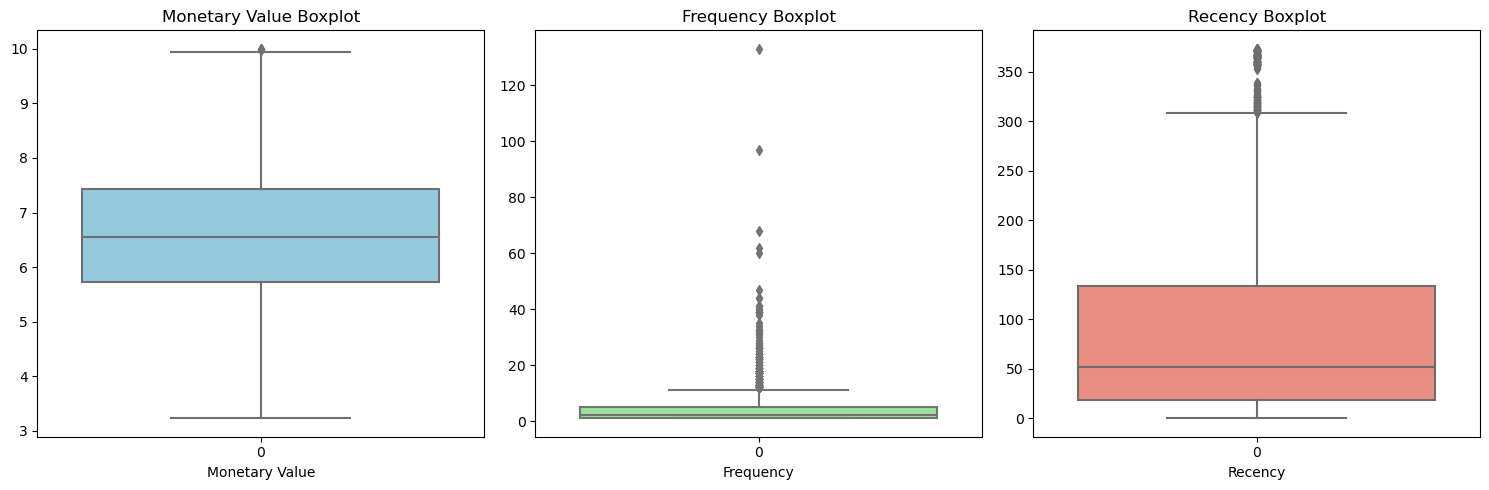

In [212]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=non_outliers_df["Log_MonetaryValue"], color= "skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_df["Frequency"], color= "lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data = non_outliers_df["Recency"],color= "salmon")
plt.title("Recency Boxplot")
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

Text(0.5, 0.92, '3D Scatterplot of Customer Data')

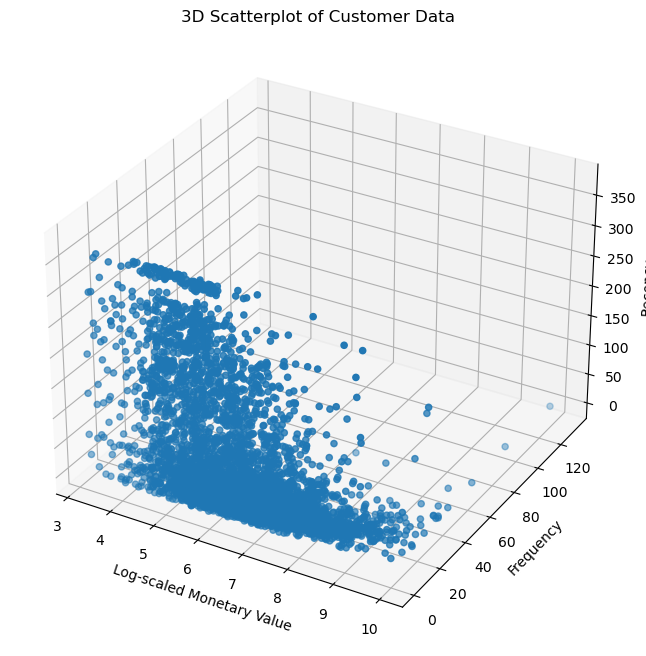

In [213]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["Log_MonetaryValue"], non_outliers_df["Frequency"],non_outliers_df["Recency"])

ax.set_xlabel('Log-scaled Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title("3D Scatterplot of Customer Data")

In [214]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["Log_MonetaryValue","Frequency","Recency"]])

scaled_data

array([[-1.21256757, -0.37656908,  0.77234307],
       [ 0.49851112, -0.37656908, -0.91226707],
       [-0.99105539, -0.56185804, -0.17395028],
       ...,
       [-0.54759018, -0.56185804,  2.13458954],
       [ 0.44860431, -0.37656908,  0.22120518],
       [ 0.95789796, -0.00599117, -0.75628465]])

In [215]:
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers_df.index, columns = ("Log_MonetaryValue","Frequency","Recency"))

scaled_data_df

,Log_MonetaryValue,Frequency,Recency
0,-1.21,-0.38,0.77
1,0.50,-0.38,-0.91
2,-0.99,-0.56,-0.17
3,0.93,-0.38,-0.50
4,-0.74,-0.56,-0.83
...,...,...,...
4280,-0.10,0.36,-0.76
4281,-0.47,-0.56,-0.25
4282,-0.55,-0.56,2.13
4283,0.45,-0.38,0.22


Text(0.5, 0.92, '3D Scatterplot of Customer Data')

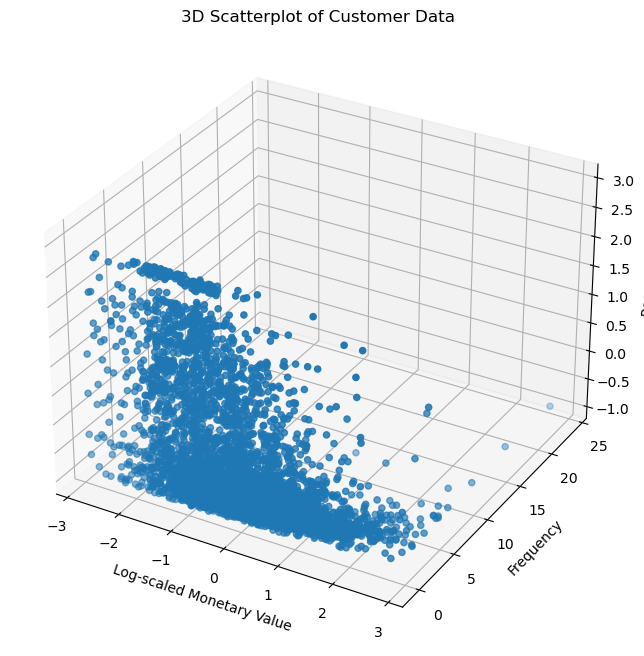

In [216]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["Log_MonetaryValue"], scaled_data_df["Frequency"],scaled_data_df["Recency"])

ax.set_xlabel('Log-scaled Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title("3D Scatterplot of Customer Data")

K-means Clustering

c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

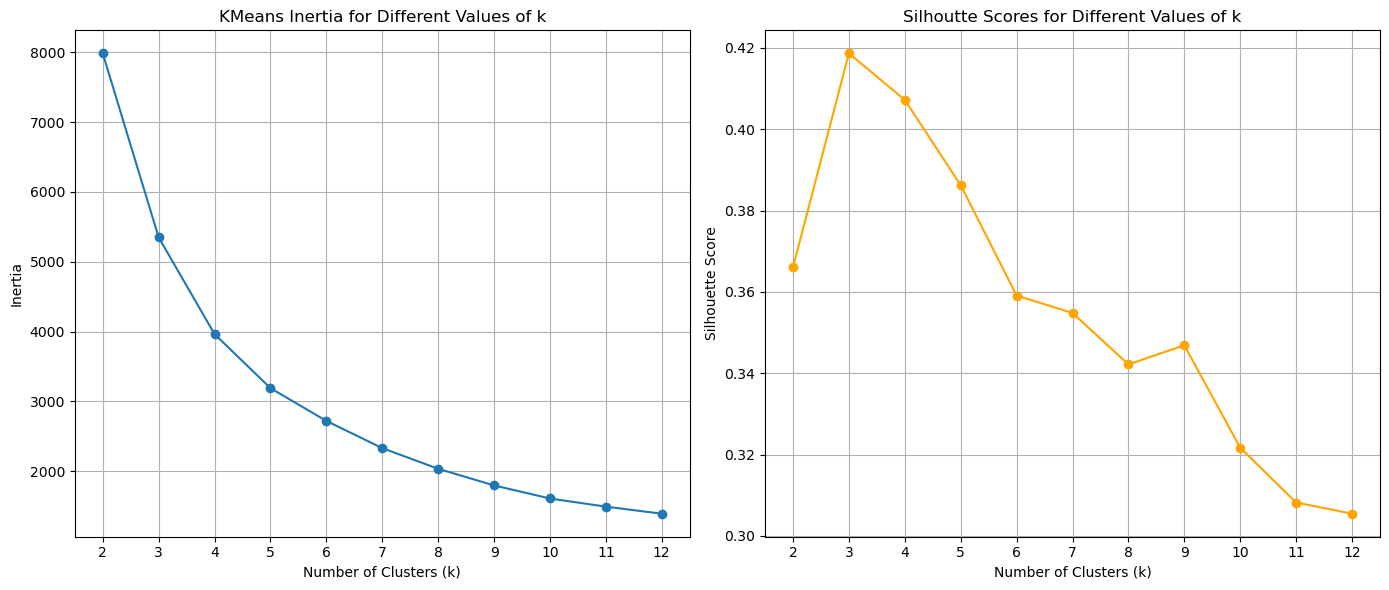

In [217]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2,max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k,random_state=42, max_iter= 1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhouette_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)

plt.plot(k_values, inertia, marker ='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker ='o', color ="orange")
plt.title('Silhoutte Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [218]:
kmeans = KMeans (n_clusters=4,random_state=42,max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 2, 0, ..., 1, 2, 2])

In [219]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df



C:\Users\Sebastian\AppData\Local\Temp\ipykernel_22000\1973625211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Log_MonetaryValue,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,5.14,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,7.19,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73,5.40,0
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,7.71,2
4,12351.00,300.93,1,2010-11-29 15:23:00,10,5.71,0
...,...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,6.47,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,6.02,0
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,5.93,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,7.13,2


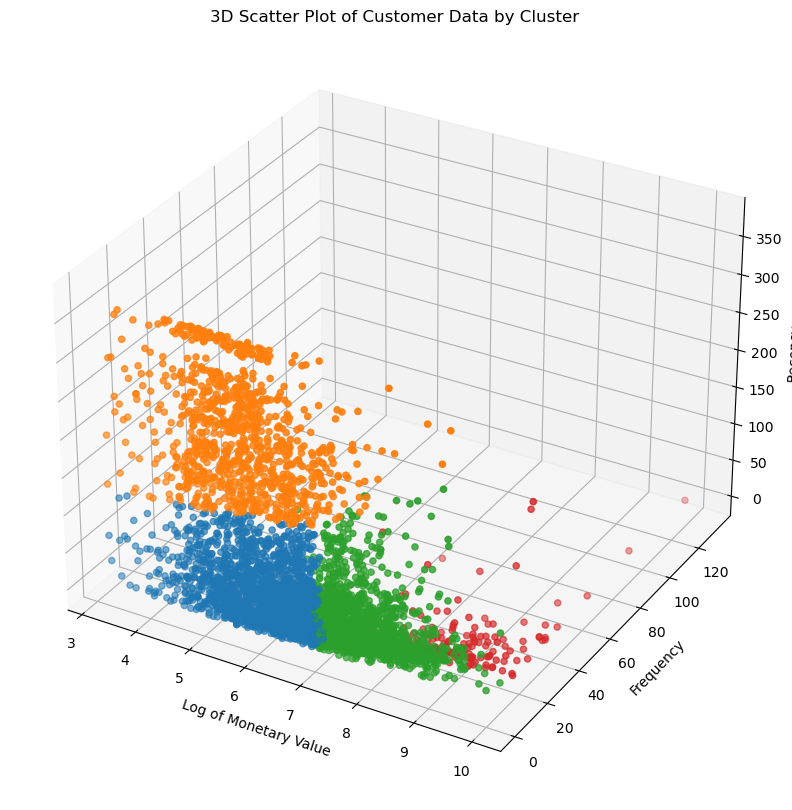

In [220]:
cluster_colors = { 0: '#1f77b4',
                   1: '#ff7f0e',
                   2: '#2ca02c',
                   3: '#d62728'}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df["Log_MonetaryValue"],
                     non_outliers_df["Frequency"],
                     non_outliers_df["Recency"],
                     c=colors,
                     marker = "o")

ax.set_xlabel("Log of Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data by Cluster")

plt.show()

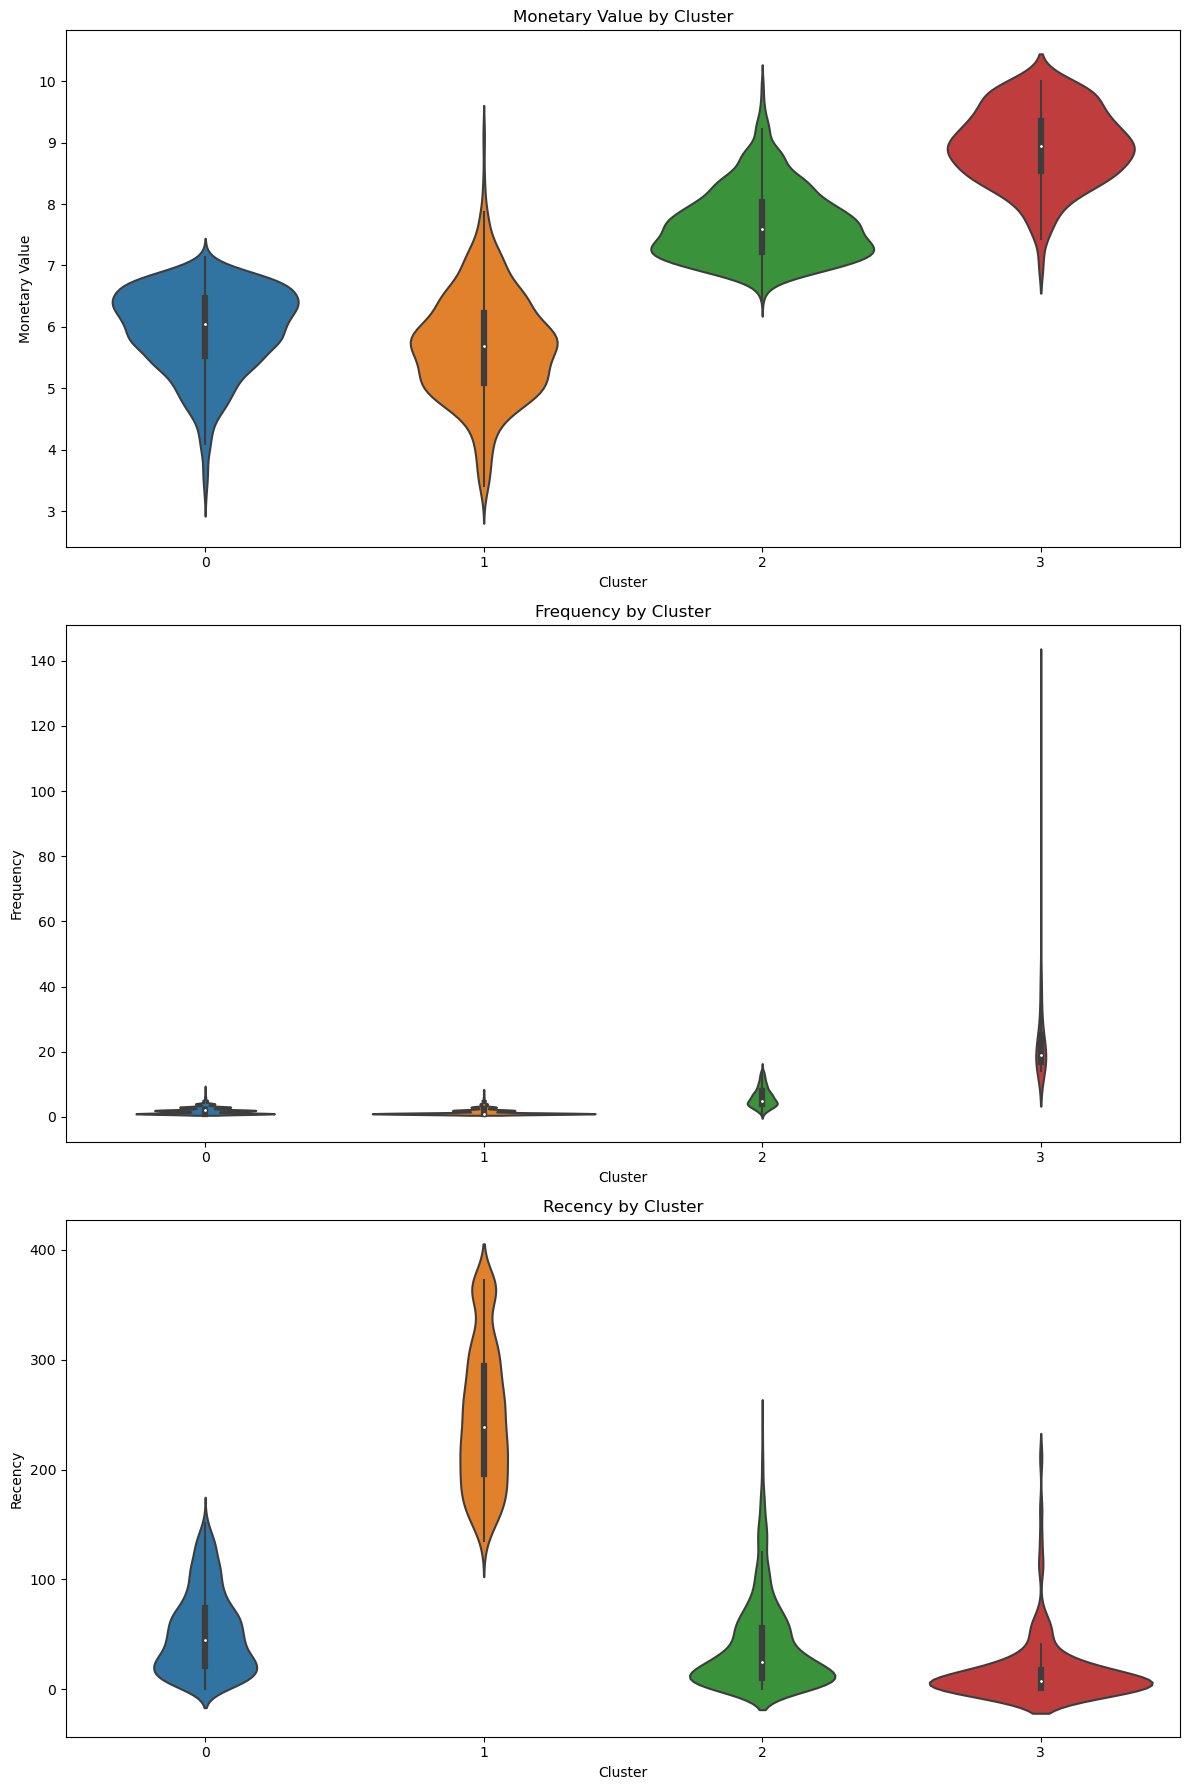

In [221]:
plt.figure(figsize=(12, 18))

# Plot Monetary Value by Cluster
plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Log_MonetaryValue'], palette=cluster_colors)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

# Plot Frequency by Cluster
plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# Plot Recency by Cluster
plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): "Retain"
* Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
* Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Re-Engage"
* Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green): "Nurture"
* Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
* Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"
* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
* Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

**Summary of Cluster Names:**

* Cluster 0 (Blue): "Retain"
* Cluster 1 (Orange): "Re-Engage"
* Cluster 2 (Green): "Nurture"
* Cluster 3 (Red): "Reward"

In [222]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Log_MonetaryValue,Cluster
515,13112.00,20.60,1,2010-06-16 17:03:00,176,3.07,-1
552,13163.00,17.65,1,2010-04-08 16:21:00,245,2.93,-1
1000,13788.00,3.75,1,2010-07-22 15:50:00,140,1.56,-1
1079,13902.00,34023.26,5,2010-03-17 13:09:00,267,10.43,-1
1216,14095.00,2.95,1,2009-12-17 12:49:00,357,1.37,-1
...,...,...,...,...,...,...,...
3718,17511.00,84541.17,31,2010-12-07 09:51:00,2,11.35,-3
3962,17841.00,29879.25,91,2010-12-09 17:27:00,0,10.30,-3
3969,17850.00,51208.87,155,2010-12-02 15:27:00,7,10.84,-3
4038,17949.00,51117.00,73,2010-12-03 13:12:00,6,10.84,-3


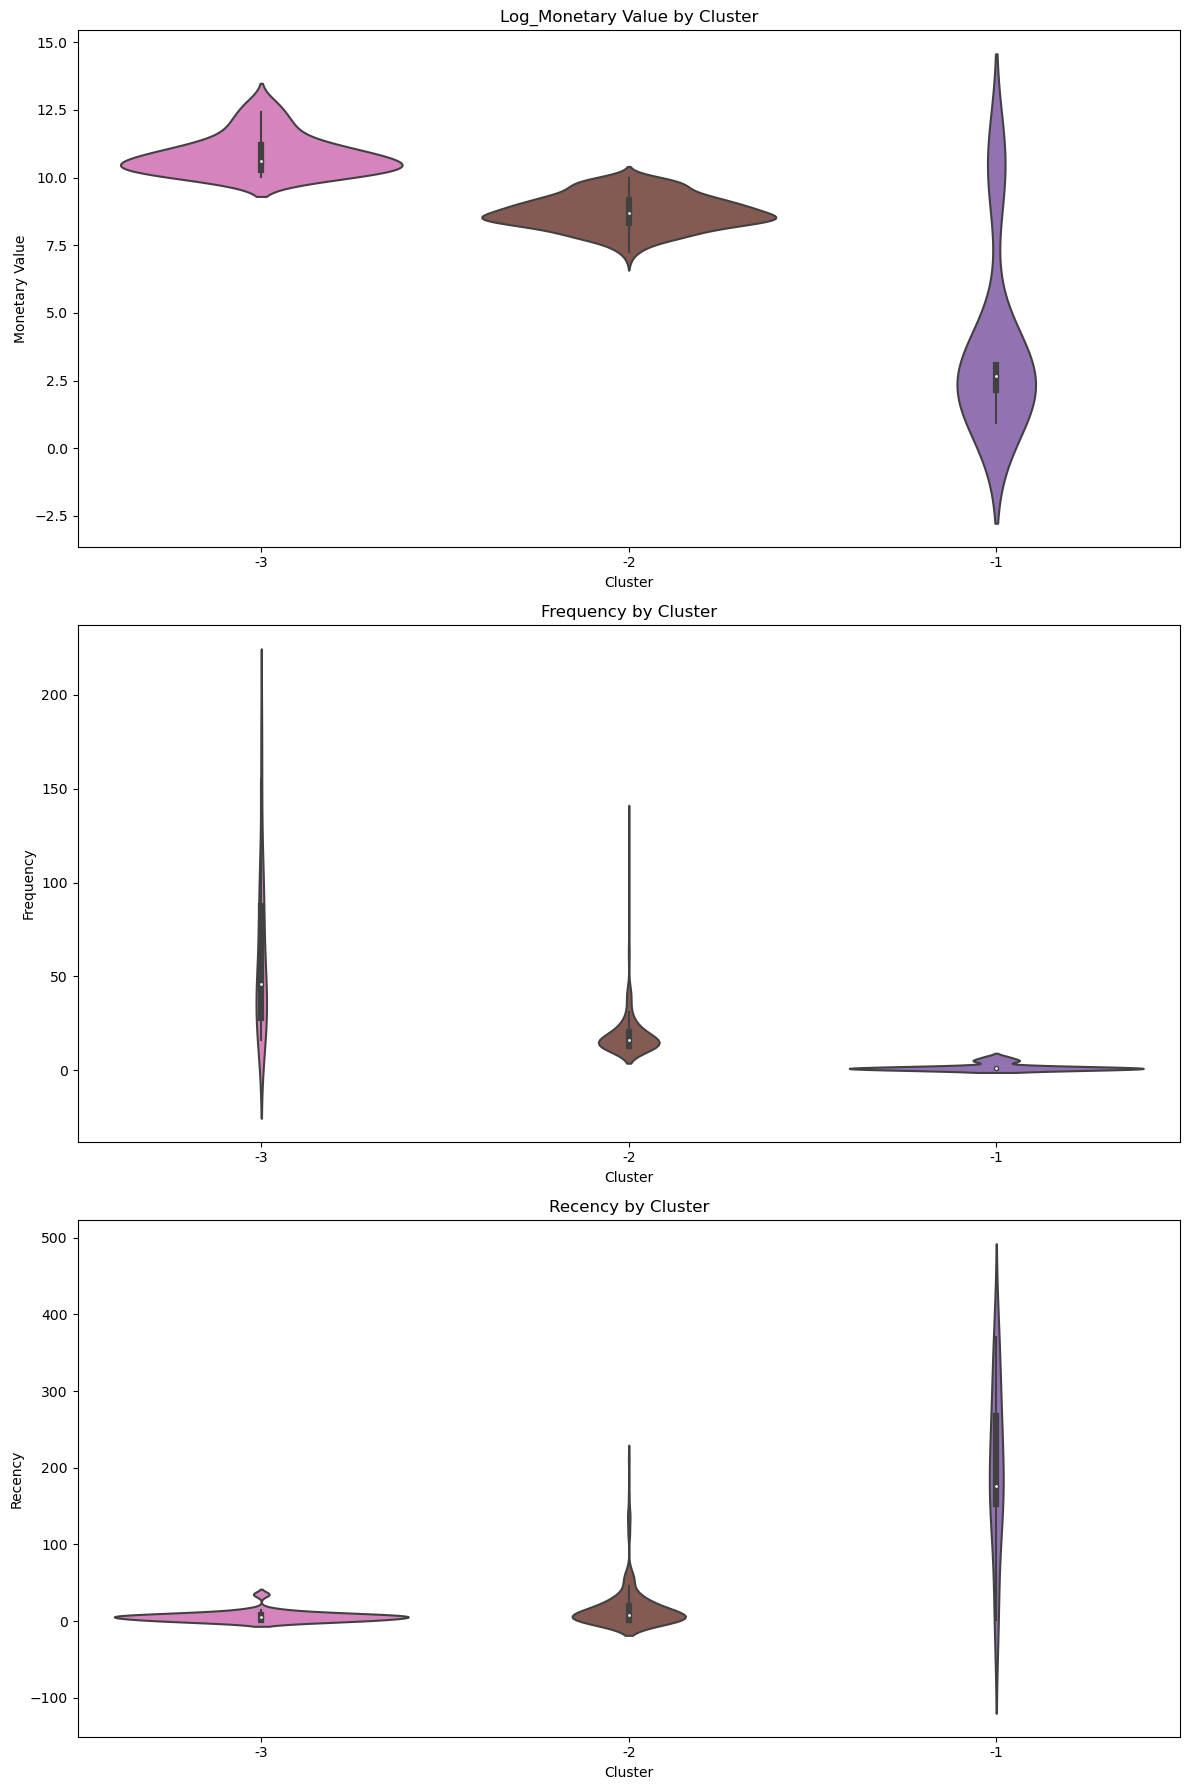

In [223]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

# Plot Log_Monetary Value by Cluster
plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Log_MonetaryValue'], palette=cluster_colors)
plt.title('Log_Monetary Value by Cluster')
plt.ylabel('Monetary Value')

# Plot Frequency by Cluster
plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# Plot Recency by Cluster
plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


* Cluster -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Cluster -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [224]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [225]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Log_MonetaryValue,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,5.14,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,7.19,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73,5.40,0
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,7.71,2
4,12351.00,300.93,1,2010-11-29 15:23:00,10,5.71,0
...,...,...,...,...,...,...,...
3718,17511.00,84541.17,31,2010-12-07 09:51:00,2,11.35,-3
3962,17841.00,29879.25,91,2010-12-09 17:27:00,0,10.30,-3
3969,17850.00,51208.87,155,2010-12-02 15:27:00,7,10.84,-3
4038,17949.00,51117.00,73,2010-12-03 13:12:00,6,10.84,-3


In [226]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Log_MonetaryValue,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,5.14,1,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,7.19,2,NURTURE
2,12348.00,221.16,1,2010-09-27 14:59:00,73,5.40,0,RETAIN
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,7.71,2,NURTURE
4,12351.00,300.93,1,2010-11-29 15:23:00,10,5.71,0,RETAIN
...,...,...,...,...,...,...,...,...
3718,17511.00,84541.17,31,2010-12-07 09:51:00,2,11.35,-3,DELIGHT
3962,17841.00,29879.25,91,2010-12-09 17:27:00,0,10.30,-3,DELIGHT
3969,17850.00,51208.87,155,2010-12-02 15:27:00,7,10.84,-3,DELIGHT
4038,17949.00,51117.00,73,2010-12-03 13:12:00,6,10.84,-3,DELIGHT


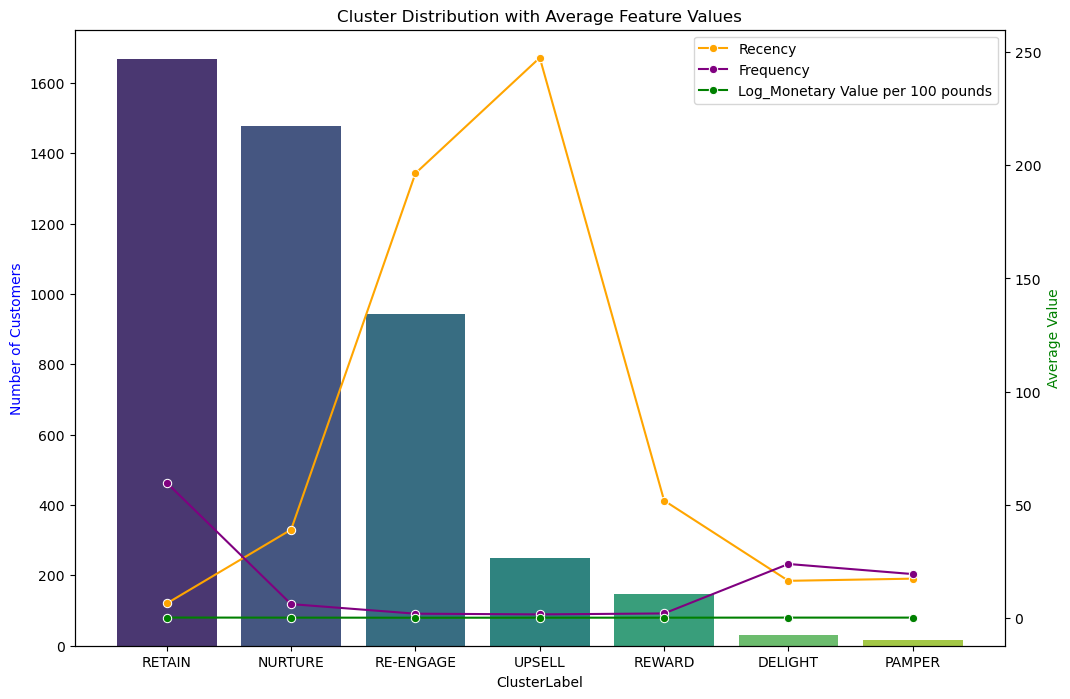

In [227]:
fig, ax1 = plt.subplots(figsize=(12, 8))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Set up secondary axis
ax2 = ax1.twinx()

# Plot the average feature values as separate lines
sns.lineplot(x=feature_means.index, y=feature_means['Recency'], ax=ax2, color='orange', marker='o', label='Recency')
sns.lineplot(x=feature_means.index, y=feature_means['Frequency'], ax=ax2, color='purple', marker='o', label='Frequency')
sns.lineplot(x=feature_means.index, y=feature_means['Log_MonetaryValue per 100 pounds'], ax=ax2, color='green', marker='o', label='Log_Monetary Value per 100 pounds')

# Set y-axis label for the secondary axis and adjust colors
ax2.set_ylabel('Average Value', color='g')

# Add legend for clarity
ax2.legend(loc='upper right')

# Show plot
plt.show()